<a href="https://colab.research.google.com/github/SylphyHorn/Data-Science-Note/blob/main/CMT307_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Session 1 
This session consists of some first steps of a machine learning process:

*   loading data
*   data exploration
*   data pre-processing including
    * dealing with missing values
    * encoding categorical features
    * feature scaling

Author: Yuhua Li

Date:   November 2021 updated

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


# Get data

---



In [3]:
# load Titanic data from URL
titanic = pd.read_csv('http://bit.ly/kaggletrain')
#titanic = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv')


Have an initia inspection of the data

In [4]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) # print all columns in full, prevent line break

print('\nInformation of the titanic dataset...... \n')
print(titanic.info())
print('\nColumn names of the dataset...... \n', titanic.columns)


print('\nBelow is the first few lines of the dataset......\n', titanic.head(10))
print('\nBelow is the statistics of the dataset......\n', titanic.describe())


Information of the titanic dataset...... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Column names of the dataset...... 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Belo

The dataset contains columns for passenger IDs, names and ticket numbers, which aren't useful for modelling. So we can remove 'PassengerId', 'Name', 'Ticket' columns from the original dataset. Note  generally we need to remove personally identifiable information from a dataset to avoid violation of the law of GDPR (Genrla Data Protection Regulation).

In [ ]:
try:
  titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)
except KeyError:
  print('Attributes already removed')

print(titanic.head(10))

# Dealing with missing values

We first check if there are missing values in each feature, 0 for no missing value or the number for the number of missing values. You will see there missing values for Age, Cabin and Embarked

In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As you can see from above, there are missing values in this Titanic dataset. 

Some packages of machine learning methods provide the ability of dealing with a dataset with missing values so they can take the data directly without us explicitly dealing with missing values. However, many others need us to process missing values before feeding the dataset for machine leanring modelling.

You have a few options to deal with missing values:
1. Get rid of the corresponding instances.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).
4. Use imputation methods.

## 1. Get rid of the corresponding instances containing missing values. 
If the number of instances in a dataset is large and the fraction of intances with missing values is samll, an easy way is simply to remove those instances containing missing values.


In [8]:
print('Data size BEFORE deleteting instances with missing values: ', titanic.shape)

titanic_ins = titanic.dropna(subset=['Age', 'Cabin', 'Embarked'])
print('\nData size AFTER deleteting instances containing missing values: ', titanic_ins.shape)
titanic_ins.isna().sum()

Data size BEFORE deleteting instances with missing values:  (891, 12)

Data size AFTER deleteting instances containing missing values:  (183, 12)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 2. Get rid of the whole attribute.

As seen above, the feature Cabin contains 687 missing values which is a significant portion of the total instances (891). If we remove those instances based on Cabin feature (and Age and Embarked), we only get 183 instances left from the original 891 instances, which means we lost majority portion of the original dataset. So we'd better drop the feature of *Cabin* entirely.

In [9]:
titanic1 = titanic.drop("Cabin", axis=1)
print(titanic1.head())
titanic1.isna().sum()

   PassengerId  Survived  Pclass                                                 Name     Sex   Age  SibSp  Parch            Ticket     Fare Embarked
0            1         0       3                              Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0          PC 17599  71.2833        C
2            3         1       3                               Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250        S
3            4         1       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000        S
4            5         0       3                             Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500        S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

## 3. Set the missing values to some value
After removing the entire feature of *Cabin*, the resulting dataset ***titanic1*** still contains missing values for *Age* and *Embarked*. We may fill the missing values by statistics, e.g., mean and median of a numeric feature or the most frequent value of a categorical feature, etc.

In [11]:
# Age is a numeric feature, we may replace missign values by the median of Age 
median = titanic1["Age"].median() # option 3
titanic1["Age"].fillna(median, inplace=True)
print('After filling missing values of Age\n', titanic1.isna().sum())

After filling missing values of Age
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


## 4. Use imputation methods.
sci-kit learn provide many imputation methods. Here we replace missing values of *Embarked* using its mode, i.e., its most frequent value.


In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(titanic1)
embarked = imputer.transform(titanic1)

#print(embarked[:20, ])
print(embarked.shape)
print(pd.DataFrame(embarked).isna().sum())
pd.DataFrame(embarked).info()

(891, 11)
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       891 non-null    object
 1   1       891 non-null    object
 2   2       891 non-null    object
 3   3       891 non-null    object
 4   4       891 non-null    object
 5   5       891 non-null    object
 6   6       891 non-null    object
 7   7       891 non-null    object
 8   8       891 non-null    object
 9   9       891 non-null    object
 10  10      891 non-null    object
dtypes: object(11)
memory usage: 76.7+ KB


# Data Exploration

## Scatter plot

Scatter plot shows data distribution of a pair of features, it can visuallly reveal the relationship between a feature pair.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42656e61d0>,
      dtype=object)

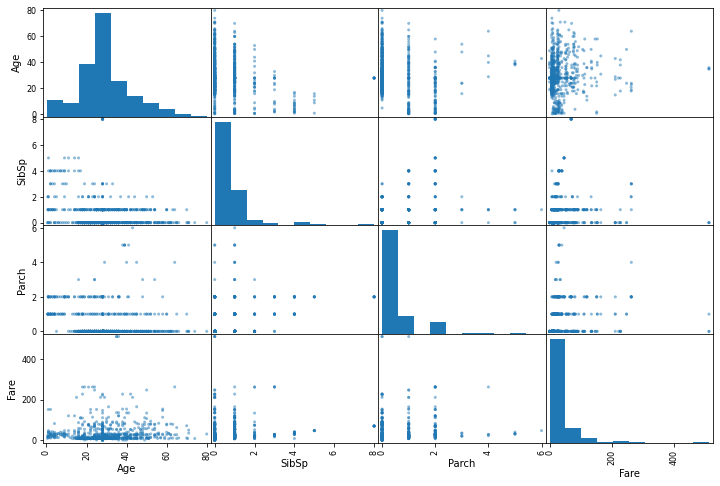

In [12]:
# use scatter_matrix of pandas.plotting
from pandas.plotting import scatter_matrix
scatter_matrix(titanic1[['Age', 'SibSp', 'Parch', 'Fare']], figsize=(12, 8))

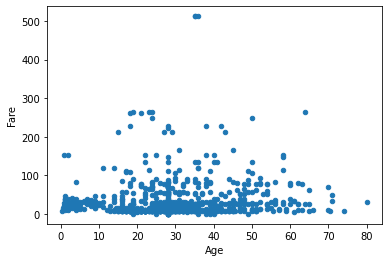

In [13]:
# use plot of pandas DataFrame
titanic1.plot(kind='scatter', x='Age', y='Fare')

## Box plot

              Age        Fare
count  891.000000  891.000000
mean    29.361582   32.204208
std     13.019697   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200


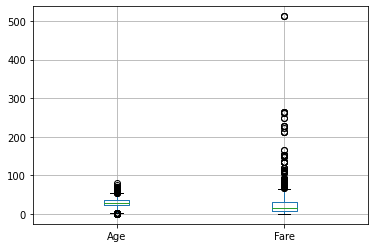

In [14]:
print(titanic1[['Age', 'Fare']].describe())
titanic1[['Age', 'Fare']].boxplot()

## Correlation
Correlation coefficient measures linear relationship between a pair of variables, range [-1, 1]. 1 indicates full linear relationship, 0 no linear relationship, -1 negatively linear relationship.

In [15]:
corr_matrix = titanic1.corr()
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000


## Histogram

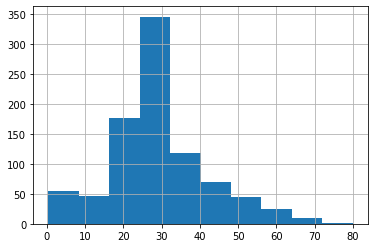

In [16]:
titanic1['Age'].hist()

# Feature scaling
Feature scaling is a neccessary steps for most machine learning methods in order to achieve good learning performance and faster learning process.

There are two commonly used feature scaling methods: 
1. Scaling features to a range: e.g., min-max scaling
2. Standardization: zero mean and unit variance

## 1. Scaling features to a range

In [17]:
from sklearn.preprocessing import MinMaxScaler

minMax_scale = MinMaxScaler()   # to default range [0, 1]
titanic1['Age'] = minMax_scale.fit_transform(titanic1[['Age']])

titanic1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,0.472229,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0.334004,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.346569,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0.321438,0,0,111369,30.0000,C


## Standardization (z-score)
Standardization scales a featue to a feature with 0 mean and 1 standard deviation.

In [18]:
from sklearn.preprocessing import StandardScaler

standard_scale = StandardScaler()   # to default 0 mean and 1 standard deviation
titanic1['Fare'] = standard_scale.fit_transform(titanic1[['Fare']])

titanic1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,-0.502445,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,0.472229,1,0,PC 17599,0.786845,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,-0.488854,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.420730,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,-0.486337,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0.334004,0,0,211536,-0.386671,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,112053,-0.044381,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.346569,1,2,W./C. 6607,-0.176263,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0.321438,0,0,111369,-0.044381,C


# Encoding categorical features

Most machine learning methods take only numerical data, except decision tree based methods which can take numerical and categorical features directly. So we need to convert categories to numbers.

## One hot encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

titanic1 = titanic[['Pclass', 'Sex', 'Embarked']].dropna()
print(titanic1.info())
print('\n', titanic1.head())

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(titanic1)

print('\n', enc.categories_)
titanic2 = pd.DataFrame(enc.transform(titanic1))
titanic2.head()

## Effect encoding
A feature with N categories will produce N binary features after one hot encoding as above. One of the N binary features is perfectly collinear with the other N-1 features. This means there are only N-1 non-collinear binary features for a N-category feature. So we can drop one of the derived binary features as follows.

In [ ]:
enc = OneHotEncoder(drop='first', sparse=False)
titanic1 = titanic[['Pclass', 'Sex', 'Embarked']].dropna()
print(titanic1.head())
enc.fit(titanic1)
titanic2 = pd.DataFrame(enc.transform(titanic1))
print(titanic2.shape)

titanic2 = pd.concat([titanic2, titanic[['Age', 'SibSp',  'Parch', 'Fare']]], axis=1)
titanic2.head()

## Use Transformer
Or use make_column_transformer to encode the named categorical features and keep other features unchanged

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(pd.DataFrame(titanic1["Embarked"]))
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

titanic3 = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
print('Before filling missing values of Age\n', titanic3.isna().sum())
print(titanic3.shape)
print(titanic3)

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
titanic3["Embarked"] = imputer.fit_transform(pd.DataFrame(titanic3["Embarked"]))
imputer = SimpleImputer(strategy="median")
titanic3["Age"] = imputer.fit_transform(pd.DataFrame(titanic3["Age"]))
print('After filling missing values of Age\n', titanic3.isna().sum())

print(titanic3.shape)
print(titanic3)

col_trans = make_column_transformer(
    #(SimpleImputer(strategy="most_frequent", add_indicator=True), ["Embarked"]),
    #(SimpleImputer(strategy="median", add_indicator=True), ["Age"]),
    (OneHotEncoder(), ['Sex', 'Embarked']),
    remainder = 'passthrough')

titanic_ce = col_trans.fit_transform(titanic3)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=True, precision=2)
print(titanic_ce[0:20, ])

## Exercise

Read Category Encoders for other encoding methods on https://contrib.scikit-learn.org/category_encoders/

# First machine learning project
Finally we put things together to practice our first machine learning project, here we build a k-nerest neighbours model to predict Suvival based on passengers' data.

## Get data

In [ ]:
import pandas as pd 

# Get a new copy of titanic data. 
# We ignore 'PassengerId', 'Name' and 'Ticket', as they are useless for machine learnign.
# We also ignore 'Cabin' as it contains too many missing values.
titanic = pd.read_csv('http://bit.ly/kaggletrain')
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)

pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False)
print(titanic)

titanic_x = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
titanic_y = titanic[['Survived']]

print(titanic_x.head(20))
#print(titanic_x['Embarked'].isna().sum())

## Split data into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_x, titanic_y, test_size=0.3, random_state=42)
X_train

## Preprocessing Pipeline & ColumnTransformer
We now put all transformations using Pipeline & ColumnTransformer. Doing so not only make code tidy but also have advantages:

*   allow to include the preprocessing steps in the hyperparameter tuning (will learn later)
*   avoid data leakage, i.e., avoid making the mistake of using any test data for model training
*   guarantee that your data is always preprocessed the same way. For example,  if a categorical feature has a category in the test set that does not occur in the training set or a category in the training set that doesn't occur in the test set.



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
#from sklearn.compose import make_column_transformer

# transformer for categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# transformer for numerical features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)


titanic_processed = preprocessor.fit_transform(titanic_x)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=True, precision=2)

print(titanic_processed[0:20, :])

## Define the model
We use a pipeline to put together the preprocessor from above and the k-nearest neighbours classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

myClassfier = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('classifier', KNeighborsClassifier())
    ]
)

## Train the model

In [ ]:

myClassfier.fit(X_train, y_train)


## Evaluate the model
We evalute the performance of the trained classifier on test set.

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = myClassfier.predict(X_test)
accuracy_score(y_test, y_pred)

# Exercise
Download Credit Approval Data Set from UCI Machine Learning Repsoitory. Do:

- practicing exploratory data analysis
- dealing with missing values if any
- encoding categorical features
- scaling features
- if you have time, implementing a classifier to predict if a credit card application is approved (+ of the last column) or reject (- of the last column)

You can read more information about the data set from https://archive.ics.uci.edu/ml/datasets/Credit+Approval

In [ ]:
import pandas as pd

# Get Credit Approval Data Set
crx = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header='infer')
crx.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'Target']

# Start writing your IPython notebook............
